# Generate Weather Condition Effect on Image

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils.data_preparation import convert_labels, add_rain, add_fog
import os
from pathlib import Path
import shutil
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Adjust Roboflow Label Classes

In [ ]:
class_txt = Path("../resource/kitti_class_list.txt")

env_setting = "asphalt_cloudy"      # gray_clear, asphalt_clear, gray_cloudy, gray_night, gray_sunset, asphalt_cloudy
label_path = Path("../../../data")
data_yaml = label_path / env_setting / "labels" / "data.yaml"

convert_labels(classes_txt=class_txt, data_yaml=data_yaml, label_path=label_path / env_setting / "labels")

## Weather Condition

In [3]:
data_path = Path("../../../data")

### Clear

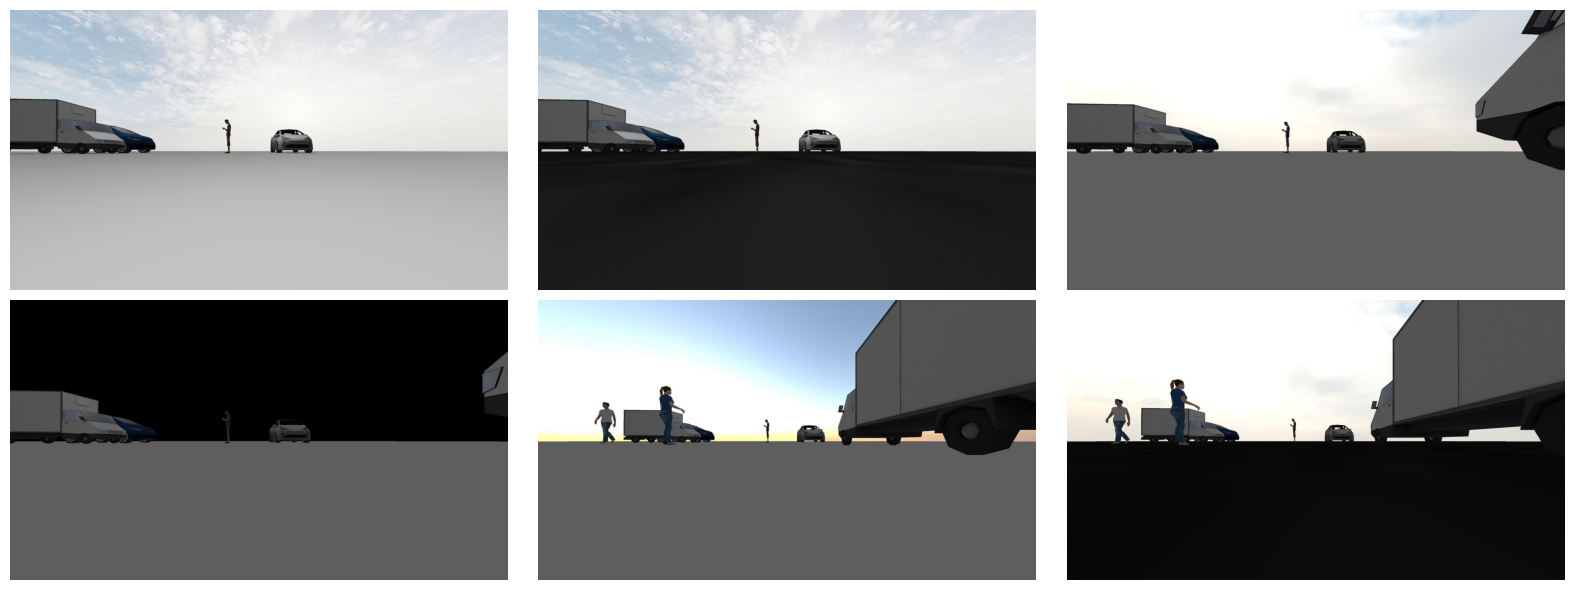

In [4]:
envs = ["gray_clear", "asphalt_clear", "gray_cloudy", "gray_night", "gray_sunset", "asphalt_cloudy"]  

fig, axes = plt.subplots(2, 3, figsize=(16,6))

axes = axes.flatten()

for i, env in enumerate(envs):
    file = "0010.jpeg"
    img = cv2.imread(data_path / f"{env}" / "images" / file)
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].axis("off")
plt.tight_layout()
plt.show()

### Rain

In [ ]:
weather = "rain"
envs = ["gray_clear", "asphalt_clear", "gray_cloudy", "gray_night", "gray_sunset", "asphalt_cloudy"]  

for env in envs:
    save_img_path = data_path / f"{env}_{weather}" / "images"
    save_label_path = data_path / f"{env}_{weather}" / "labels"
    (save_img_path).mkdir(exist_ok=True, parents=True)
    (save_label_path).mkdir(exist_ok=True, parents=True)

    files = [f for f in os.listdir(data_path / env / "images")]

    for file in files:
        label_file =f"{Path(file).stem}.txt"
        if os.path.exists(data_path / env / "labels" / label_file): # Prevent image file without coresponding label
            shutil.copy(data_path / env / "labels" / label_file, save_label_path / label_file) # Copy all ground truth labels 

            img = cv2.imread(data_path / env / "images" / file)

            if env == "gray_night":
                brightness_reduction = 10
            else:
                brightness_reduction = 50
            rain_img = add_rain(img, brightness_reduction=brightness_reduction)

            # Save image
            cv2.imwrite(save_img_path / file, rain_img)



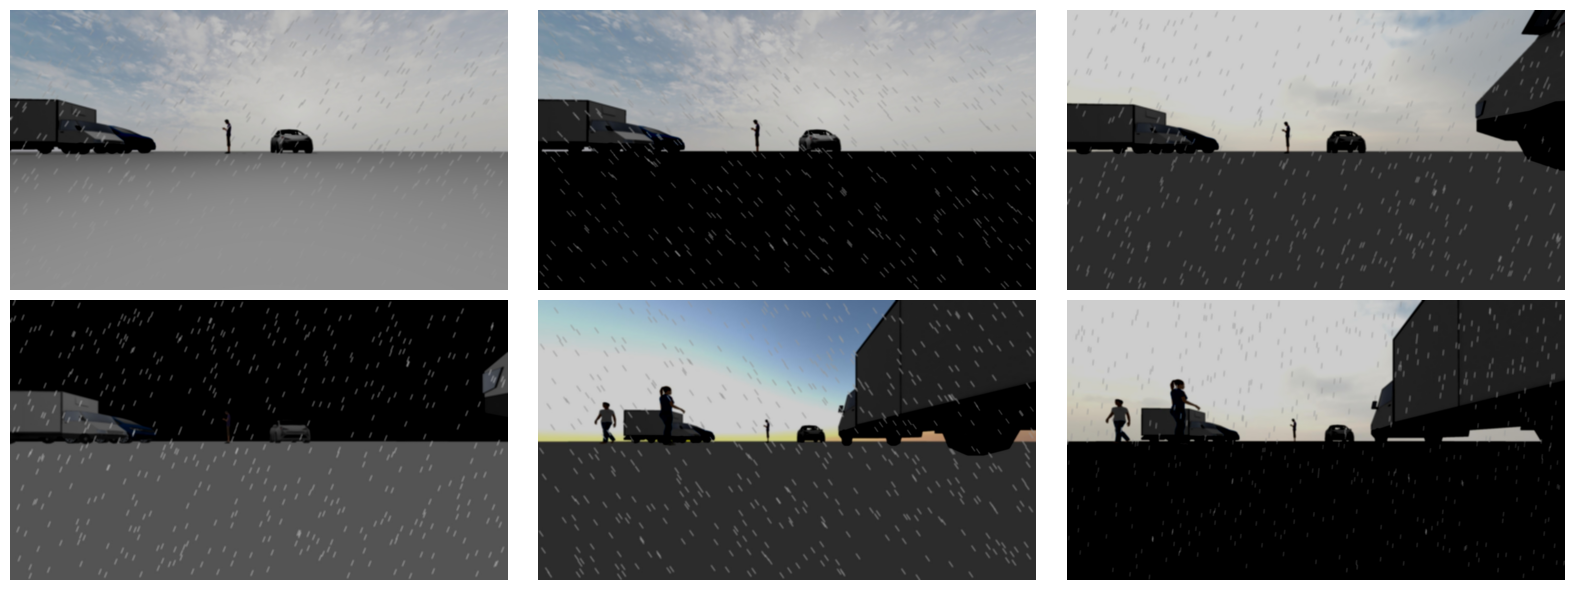

In [26]:
envs = ["gray_clear", "asphalt_clear", "gray_cloudy", "gray_night", "gray_sunset", "asphalt_cloudy"]  

fig, axes = plt.subplots(2, 3, figsize=(16,6))

axes = axes.flatten()

for i, env in enumerate(envs):
    file = "0010.jpeg"
    img = cv2.imread(data_path / f"{env}_rain" / "images" / file)
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].axis("off")
plt.tight_layout()
plt.show()

### Fog

In [4]:
weather = "fog"
envs = ["gray_clear", "asphalt_clear", "gray_cloudy", "gray_night", "gray_sunset", "asphalt_cloudy"]  

for env in envs:
    save_img_path = data_path / f"{env}_{weather}" / "images"
    save_label_path = data_path / f"{env}_{weather}" / "labels"
    (save_img_path).mkdir(exist_ok=True, parents=True)
    (save_label_path).mkdir(exist_ok=True, parents=True)

    files = [f for f in os.listdir(data_path / env / "images")]

    for file in files:
        label_file =f"{Path(file).stem}.txt"
        if os.path.exists(data_path / env / "labels" / label_file): # Prevent image file without coresponding label
            shutil.copy(data_path / env / "labels" / label_file, save_label_path / label_file) # Copy all ground truth labels 

            img = cv2.imread(data_path / env / "images" / file)

            rand_intensity = float(np.random.uniform(low=0.5, high=0.8, size=(1,))[0])
            fog_image = add_fog(img, fog_intensity=rand_intensity)

            # Save image
            cv2.imwrite(save_img_path / file, fog_image)

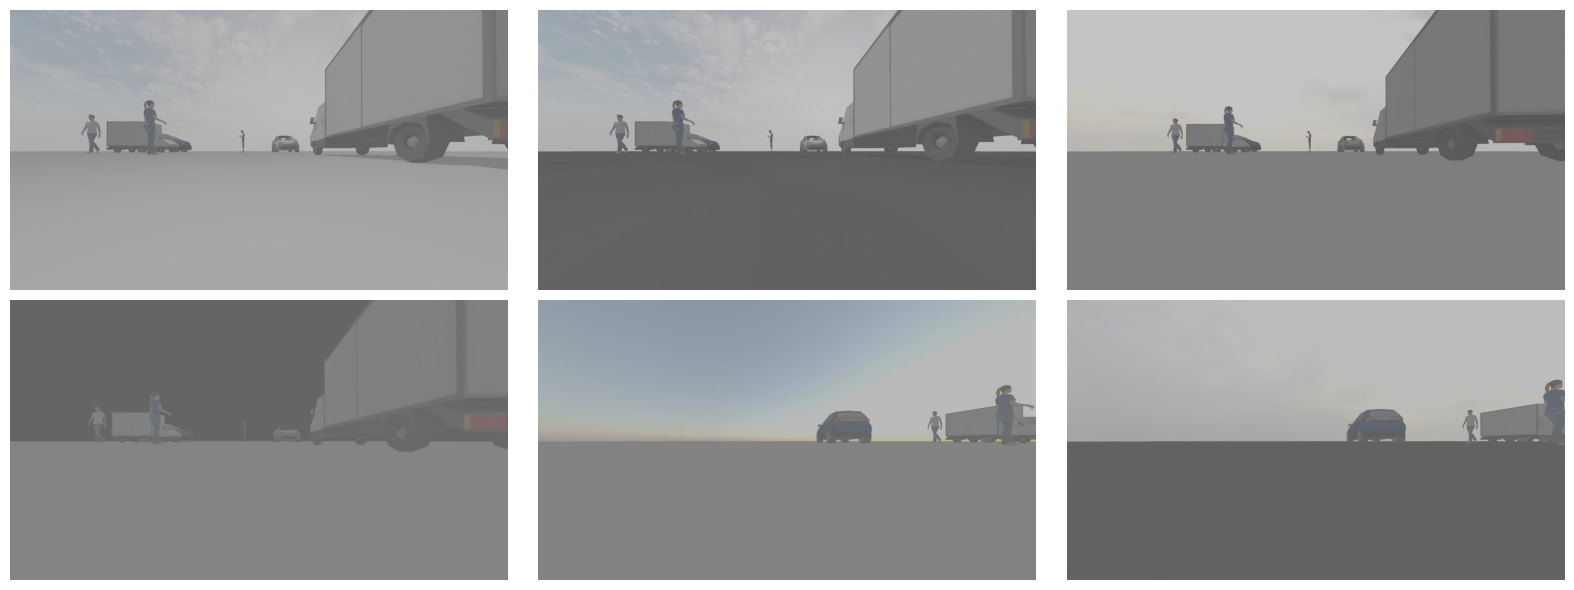

In [5]:
envs = ["gray_clear", "asphalt_clear", "gray_cloudy", "gray_night", "gray_sunset", "asphalt_cloudy"]  

fig, axes = plt.subplots(2, 3, figsize=(16,6))

axes = axes.flatten()

for i, env in enumerate(envs):
    file = "005.jpeg"
    img = cv2.imread(data_path / f"{env}_fog" / "images" / file)
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].axis("off")
plt.tight_layout()
plt.show()